<a href="https://colab.research.google.com/github/dquintani/covid/blob/main/epidemiologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lo que falta.
-cambiar las ultimas actualizaciones format a solo mostrar dia mes y año, ocultar segundos
-quitar los decimales en todos los numeros que terminan en ".0".

# Drive
enable this if you want to save stuff in your google colab drive, ALSO cool table display only for drive. before uploading to Github only enable directory = "" and silence the rest.


In [1]:
directory = ""
# from google.colab import drive
# drive.mount("/drive")
# directory = "/drive/My Drive/Colab Notebooks/epidemiologia/"


#interactive table
#from vega_datasets import data
#%load_ext google.colab.data_table

# Dependencias: importante!
if adding new dependency, and notebook is linked to a github workflow, you must make sure all dependencies are also on the requirements.txt too! If not, github workflow will fail and you wiill be very, very sad.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
from datetime import date


#dates
import matplotlib.dates as mdates

#mtick for percentages in axes
import matplotlib.ticker as mtick

#colormaps
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import matplotlib.image as mpimg


#other important requirements

In [3]:
ordenado = ['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']
ordenado

['Bolivia',
 'La Paz',
 'Cochabamba',
 'Santa Cruz',
 'Oruro',
 'Potosí',
 'Chuquisaca',
 'Tarija',
 'Beni',
 'Pando']

In [4]:
habitantes = pd.read_csv("https://raw.githubusercontent.com/dquintani/covid/main/habitantes.csv",index_col = 0)
habitantes = habitantes[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]
#habitantes = habitantes[habitantes.columns].apply(pd.to_numeric, errors = "coerce")

habitantes.to_csv(directory + "habitantes.csv")
habitantes


,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
NaN,11620000,2927000,2029000,3370000,538000,902000,637000,583000,480000,154000


# CASOS

Casos diarios y acumulados

In [5]:
casos_diarios = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/confirmados_diarios.csv",
                    index_col = 0)
casos_diarios["Bolivia"] = casos_diarios.sum(axis=1)
casos_diarios = casos_diarios[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]
casos_diarios.to_csv(directory + "casos_diarios.csv")
casos_diarios.index = pd.to_datetime(casos_diarios.index)
casos_diarios.index[-1]

Timestamp('2021-07-31 00:00:00')

In [6]:
casos_diarios7 = casos_diarios.rolling(7).mean()
casos_diarios7 = casos_diarios7.round(decimals=0)

#casos_diarios7

In [7]:
casos_acumulados = casos_diarios.cumsum(axis = 0)
casos_acumulados.to_csv(directory + "casos_acumulados.csv")

casos_acumulados

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,1,0,0,1,0,0,0,0,0,0
2020-03-12,1,0,0,1,0,0,0,0,0,0
2020-03-13,8,0,1,1,6,0,0,0,0,0
2020-03-14,8,0,1,1,6,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-07-27,470023,96545,70399,164221,23353,22047,30385,36111,20178,6784
2021-07-28,470928,96706,70547,164523,23382,22095,30518,36184,20180,6793
2021-07-29,471957,96945,70765,164821,23417,22149,30594,36273,20196,6797
2021-07-30,472812,97113,70936,165113,23443,22187,30681,36339,20202,6798


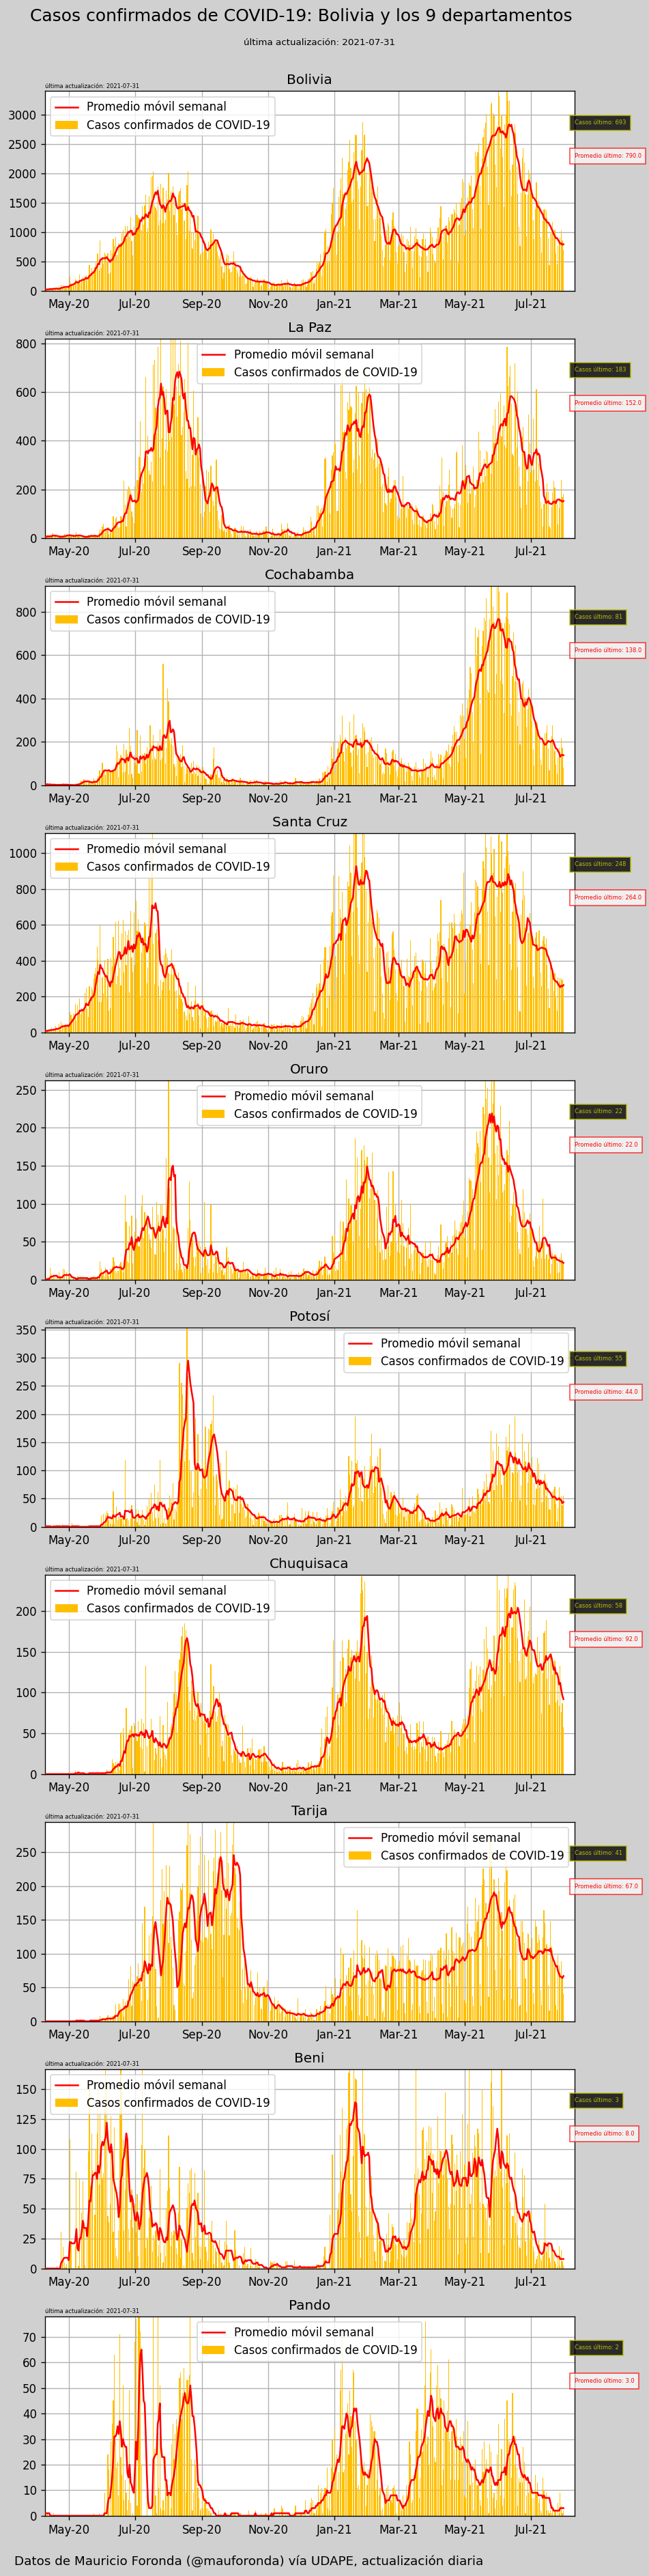

In [8]:
fig, axs = plt.subplots(10,1, figsize = (7,30), dpi=120)
fig.tight_layout(pad=0.39, w_pad=0.5, h_pad=2)

background_color1 = "#d0d0d0"
background_color2 = "w"
fig.set_facecolor(background_color1)

fig.suptitle("Casos confirmados de COVID-19: Bolivia y los 9 departamentos", fontsize= 15, y=1.03)
fig.text(0,-.01,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", fontsize=11)
fig.text(.4, 1.015,"última actualización: {}".format(casos_diarios.index[-1].date()), fontsize=8)

for i in range(10):
  axs[i].grid(zorder=3)
  axs[i].bar(casos_diarios.index, casos_diarios[casos_diarios.columns[i]], color = "#ffbf00", label="Casos confirmados de COVID-19",width = .75, zorder=2)
  axs[i].set_title(casos_diarios.columns[i])
  axs[i].plot(casos_diarios.index, casos_diarios7[casos_diarios7.columns[i]], color = "r", label="Promedio móvil semanal",zorder=3)
  axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.20)
  axs[i].set_xlim(casos_diarios.index[30], casos_diarios.index[-1] + datetime.timedelta(days=10))
  axs[i].legend()
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  axs[i].annotate( "Casos último: " + str(casos_diarios.iloc[-1,i]),
      xy = (casos_diarios7.index[-1] + datetime.timedelta(days=10), casos_diarios7[casos_diarios7.columns[i]].max()),
      fontsize=5,
      color = "y",
      bbox={
              'edgecolor': 'y',
              'facecolor': 'black', 
              'alpha': .8}
          )
  
  axs[i].annotate( "Promedio último: " + str(casos_diarios7.iloc[-1,i]),
      xy = (casos_diarios7.index[-1] + datetime.timedelta(days=10), casos_diarios7[casos_diarios7.columns[i]].max()*.8),
      fontsize=5,
      color = "r",
      bbox={
              'edgecolor': 'r',
              'facecolor': 'w', 
              'alpha': .7}
          )
  axs[i].text(casos_diarios7.index[30] - datetime.timedelta(days=0), casos_diarios7[casos_diarios7.columns[i]].max()*1.22,"última actualización: {}".format(casos_diarios.index[-1].date()), fontsize=5)



fig.savefig(directory + "graficas/casos_todos.jpg", bbox_inches="tight")

# Muertes

Muertes diarias y acumuladas

In [9]:
muertes_diarias = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/decesos_diarios.csv",
                    index_col = 0)
muertes_diarias["Bolivia"] = muertes_diarias.sum(axis=1)
muertes_diarias = muertes_diarias[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]

muertes_diarias.to_csv(directory + "muertes_diarias.csv")
muertes_diarias.index = pd.to_datetime(muertes_diarias.index)

muertes_diarias

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,0,0,0,0
2020-03-12,0,0,0,0,0,0,0,0,0,0
2020-03-13,0,0,0,0,0,0,0,0,0,0
2020-03-14,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-07-27,44,4,4,25,3,3,2,0,3,0
2021-07-28,38,5,2,19,4,2,3,2,0,1
2021-07-29,30,5,1,8,4,3,7,1,1,0
2021-07-30,22,4,3,9,2,0,1,1,2,0


In [10]:
muertes_diarias7 = muertes_diarias.rolling(7).mean()
muertes_diarias7 = muertes_diarias7.round(decimals=1)
muertes_diarias7.tail()

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2021-07-27,30.1,3.7,4.3,12.6,1.0,2.1,3.7,1.6,0.9,0.3
2021-07-28,29.7,3.9,3.6,12.7,1.6,2.3,3.6,1.1,0.7,0.3
2021-07-29,29.7,4.0,3.0,11.7,2.1,2.6,4.1,1.1,0.9,0.1
2021-07-30,27.6,4.0,3.0,10.1,2.3,1.9,4.0,1.3,0.9,0.1
2021-07-31,26.3,3.9,2.6,10.0,2.1,1.6,4.0,1.0,1.0,0.1


In [11]:
muertes_acumuladas = muertes_diarias.cumsum(axis = 0)
muertes_acumuladas.to_csv(directory + "muertes_acumuladas.csv")

muertes_acumuladas

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,0,0,0,0
2020-03-12,0,0,0,0,0,0,0,0,0,0
2020-03-13,0,0,0,0,0,0,0,0,0,0
2020-03-14,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-07-27,16089,2434,2689,5584,1197,782,1284,922,878,319
2021-07-28,16127,2439,2691,5603,1201,784,1287,924,878,320
2021-07-29,16157,2444,2692,5611,1205,787,1294,925,879,320
2021-07-30,16179,2448,2695,5620,1207,787,1295,926,881,320


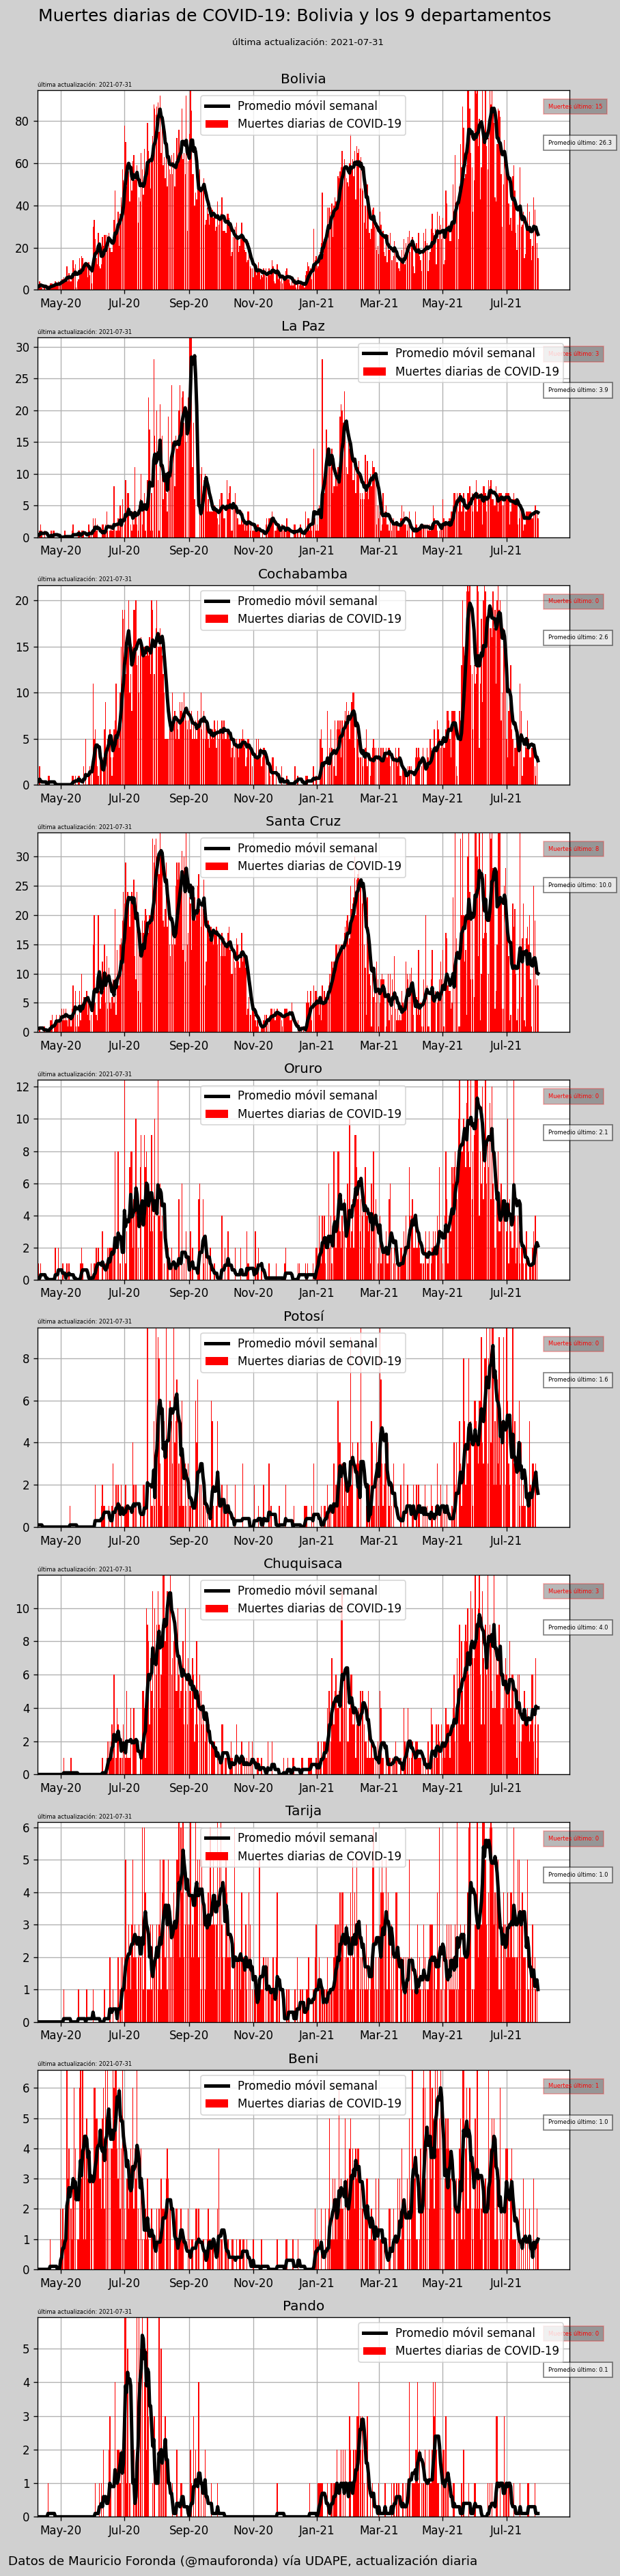

In [12]:
fig, axs = plt.subplots(10,1, figsize = (7,30), dpi=120)
fig.tight_layout(pad=0.3, w_pad=4, h_pad=2)

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("Muertes diarias de COVID-19: Bolivia y los 9 departamentos", fontsize= 15, y=1.03)
fig.text(0,-.01,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", fontsize=11)
fig.text(0.39, 1.015,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8)

for i in range(10):
  axs[i].grid(zorder=3)
  axs[i].bar(muertes_diarias.index, muertes_diarias[muertes_diarias.columns[i]], color = "r", label="Muertes diarias de COVID-19",width=.9,zorder=2)
  axs[i].set_title(muertes_diarias.columns[i])
  axs[i].plot(muertes_diarias.index, muertes_diarias7[muertes_diarias7.columns[i]], color = "black", label="Promedio móvil semanal", zorder=3, linewidth=3)
  axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,muertes_diarias7[muertes_diarias7.columns[i]].max()*1.1)
  axs[i].set_xlim(muertes_diarias.index[30], muertes_diarias.index[-1] + datetime.timedelta(days=30))
  axs[i].legend()
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  axs[i].annotate( "Muertes último: " + str(muertes_diarias.iloc[-1,i]),
      xy = (muertes_diarias.index[-1] + datetime.timedelta(days=10), muertes_diarias7[muertes_diarias7.columns[i]].max()),
      fontsize=5,
      color = "r",
      bbox={
              'edgecolor': 'r',
              'facecolor': 'black', 
              'alpha': .28}
          )
  
  axs[i].annotate( "Promedio último: " + str(muertes_diarias7.iloc[-1,i]),
      xy = (muertes_diarias7.index[-1] + datetime.timedelta(days=10), muertes_diarias7[muertes_diarias7.columns[i]].max()*.8),
      fontsize=5,
      color = "black",
      bbox={
              'edgecolor': 'black',
              'facecolor': 'w', 
              'alpha': .5}
          )

  axs[i].text(muertes_diarias7.index[30], muertes_diarias7[muertes_diarias7.columns[i]].max()*1.12,"última actualización: {}".format(muertes_diarias7.index[-1].date()), fontsize=5)


muertes_fig = fig.savefig(directory + "graficas/muertes_todos.jpg", bbox_inches="tight")

# Pruebas
Pruebas acumuladas = (casos acumulados)+(descartados acumulados)

In [13]:
pruebas_edu = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-data/master/processed/bolivia/testing.csv",
                    index_col = 0)
pruebas_edu = pruebas_edu[pruebas_edu.columns].apply(pd.to_numeric, errors = "coerce")
pruebas_edu.index = pd.to_datetime(pruebas_edu.index)

#pruebas_edu

In [14]:
col_names = ['La Paz', 'Cochabamba', 'Santa Cruz','Oruro','Potosí','Tarija','Chuquisaca', 'Beni','Pando']

In [15]:
descartados = pruebas_edu.iloc[1:,[1,3,5,7,9,11,13,15,17]]
for i in range(9):
    descartados.rename(columns={descartados.columns[i] : col_names[i]}, inplace=True)
descartados["Bolivia"] = descartados.sum(axis=1, min_count=9)

descartados.to_csv(directory + "descartados_acumulados.csv")

#descartados

In [16]:
sospechosos = pruebas_edu.iloc[1:,[0,2,4,6,8,10,12,14,16]]
#for i in range(9):
#    sospechosos.rename(columns={sospechosos.columns[i] : col_names[i]}, inplace=True)
sospechosos["Bolivia"] = sospechosos.sum(axis=1)
#sospechosos

In [17]:
pruebas_acum = casos_acumulados + descartados
pruebas_acum = pruebas_acum.drop(pruebas_acum.index[0:58], axis=0).interpolate()
pruebas_acum = pruebas_acum[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]


pruebas_acum.to_csv(directory + "pruebas_acum.csv")

pruebas_acum.tail()

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2021-07-27,2060367.0,414874.0,370414.0,807746.0,81029.0,75121.0,107910.0,110787.0,67091.0,25395.0
2021-07-28,2069309.0,417219.0,372101.0,810754.0,81351.0,75338.0,108504.0,111316.0,67255.0,25471.0
2021-07-29,2078141.0,419385.0,374340.0,813688.0,81629.0,75464.0,108868.0,111861.0,67400.0,25506.0
2021-07-30,2086420.0,421299.0,375892.0,817092.0,81917.0,75687.0,109250.0,112241.0,67498.0,25544.0
2021-07-31,2092251.0,423059.0,376553.0,819346.0,82156.0,75842.0,109633.0,112462.0,67621.0,25579.0


In [18]:
pruebas_diarias_NaN = pruebas_acum.diff()

#getting rid of negatives
pruebas_diarias = pruebas_diarias_NaN[pruebas_diarias_NaN > 0 ]
pruebas_diarias.to_csv(directory + "pruebas_diarias.csv")

pruebas_diarias.tail()

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2021-07-27,9111.0,1903.0,1852.0,3398.0,276.0,325.0,577.0,455.0,251.0,74.0
2021-07-28,8942.0,2345.0,1687.0,3008.0,322.0,217.0,594.0,529.0,164.0,76.0
2021-07-29,8832.0,2166.0,2239.0,2934.0,278.0,126.0,364.0,545.0,145.0,35.0
2021-07-30,8279.0,1914.0,1552.0,3404.0,288.0,223.0,382.0,380.0,98.0,38.0
2021-07-31,5831.0,1760.0,661.0,2254.0,239.0,155.0,383.0,221.0,123.0,35.0


In [19]:
pruebas_diarias7 = pruebas_diarias.rolling(7,min_periods=1).mean()
pruebas_diarias7

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-08,457.000000,128.000000,52.000000,157.000000,8.000000,14.000000,1.000000,13.000000,81.000000,3.000000
2020-05-09,537.750000,125.500000,49.000000,206.500000,8.000000,15.000000,14.500000,7.500000,45.000000,4.166667
2020-05-10,564.666667,107.333333,38.333333,253.333333,12.000000,19.666667,19.000000,7.500000,32.333333,4.555556
2020-05-11,578.125000,101.250000,31.000000,351.750000,12.250000,16.500000,17.000000,5.333333,45.250000,4.750000
...,...,...,...,...,...,...,...,...,...,...
2021-07-27,7328.000000,1629.571429,1442.000000,2629.714286,279.571429,324.571429,476.428571,353.857143,147.571429,44.714286
2021-07-28,7211.285714,1647.857143,1386.571429,2679.857143,271.714286,181.428571,486.714286,362.428571,147.857143,46.857143
2021-07-29,7258.571429,1643.000000,1434.714286,2724.285714,271.142857,171.714286,459.571429,366.857143,141.142857,46.142857
2021-07-30,7230.714286,1666.714286,1446.714286,2709.714286,264.000000,168.571429,440.000000,353.571429,135.714286,45.714286


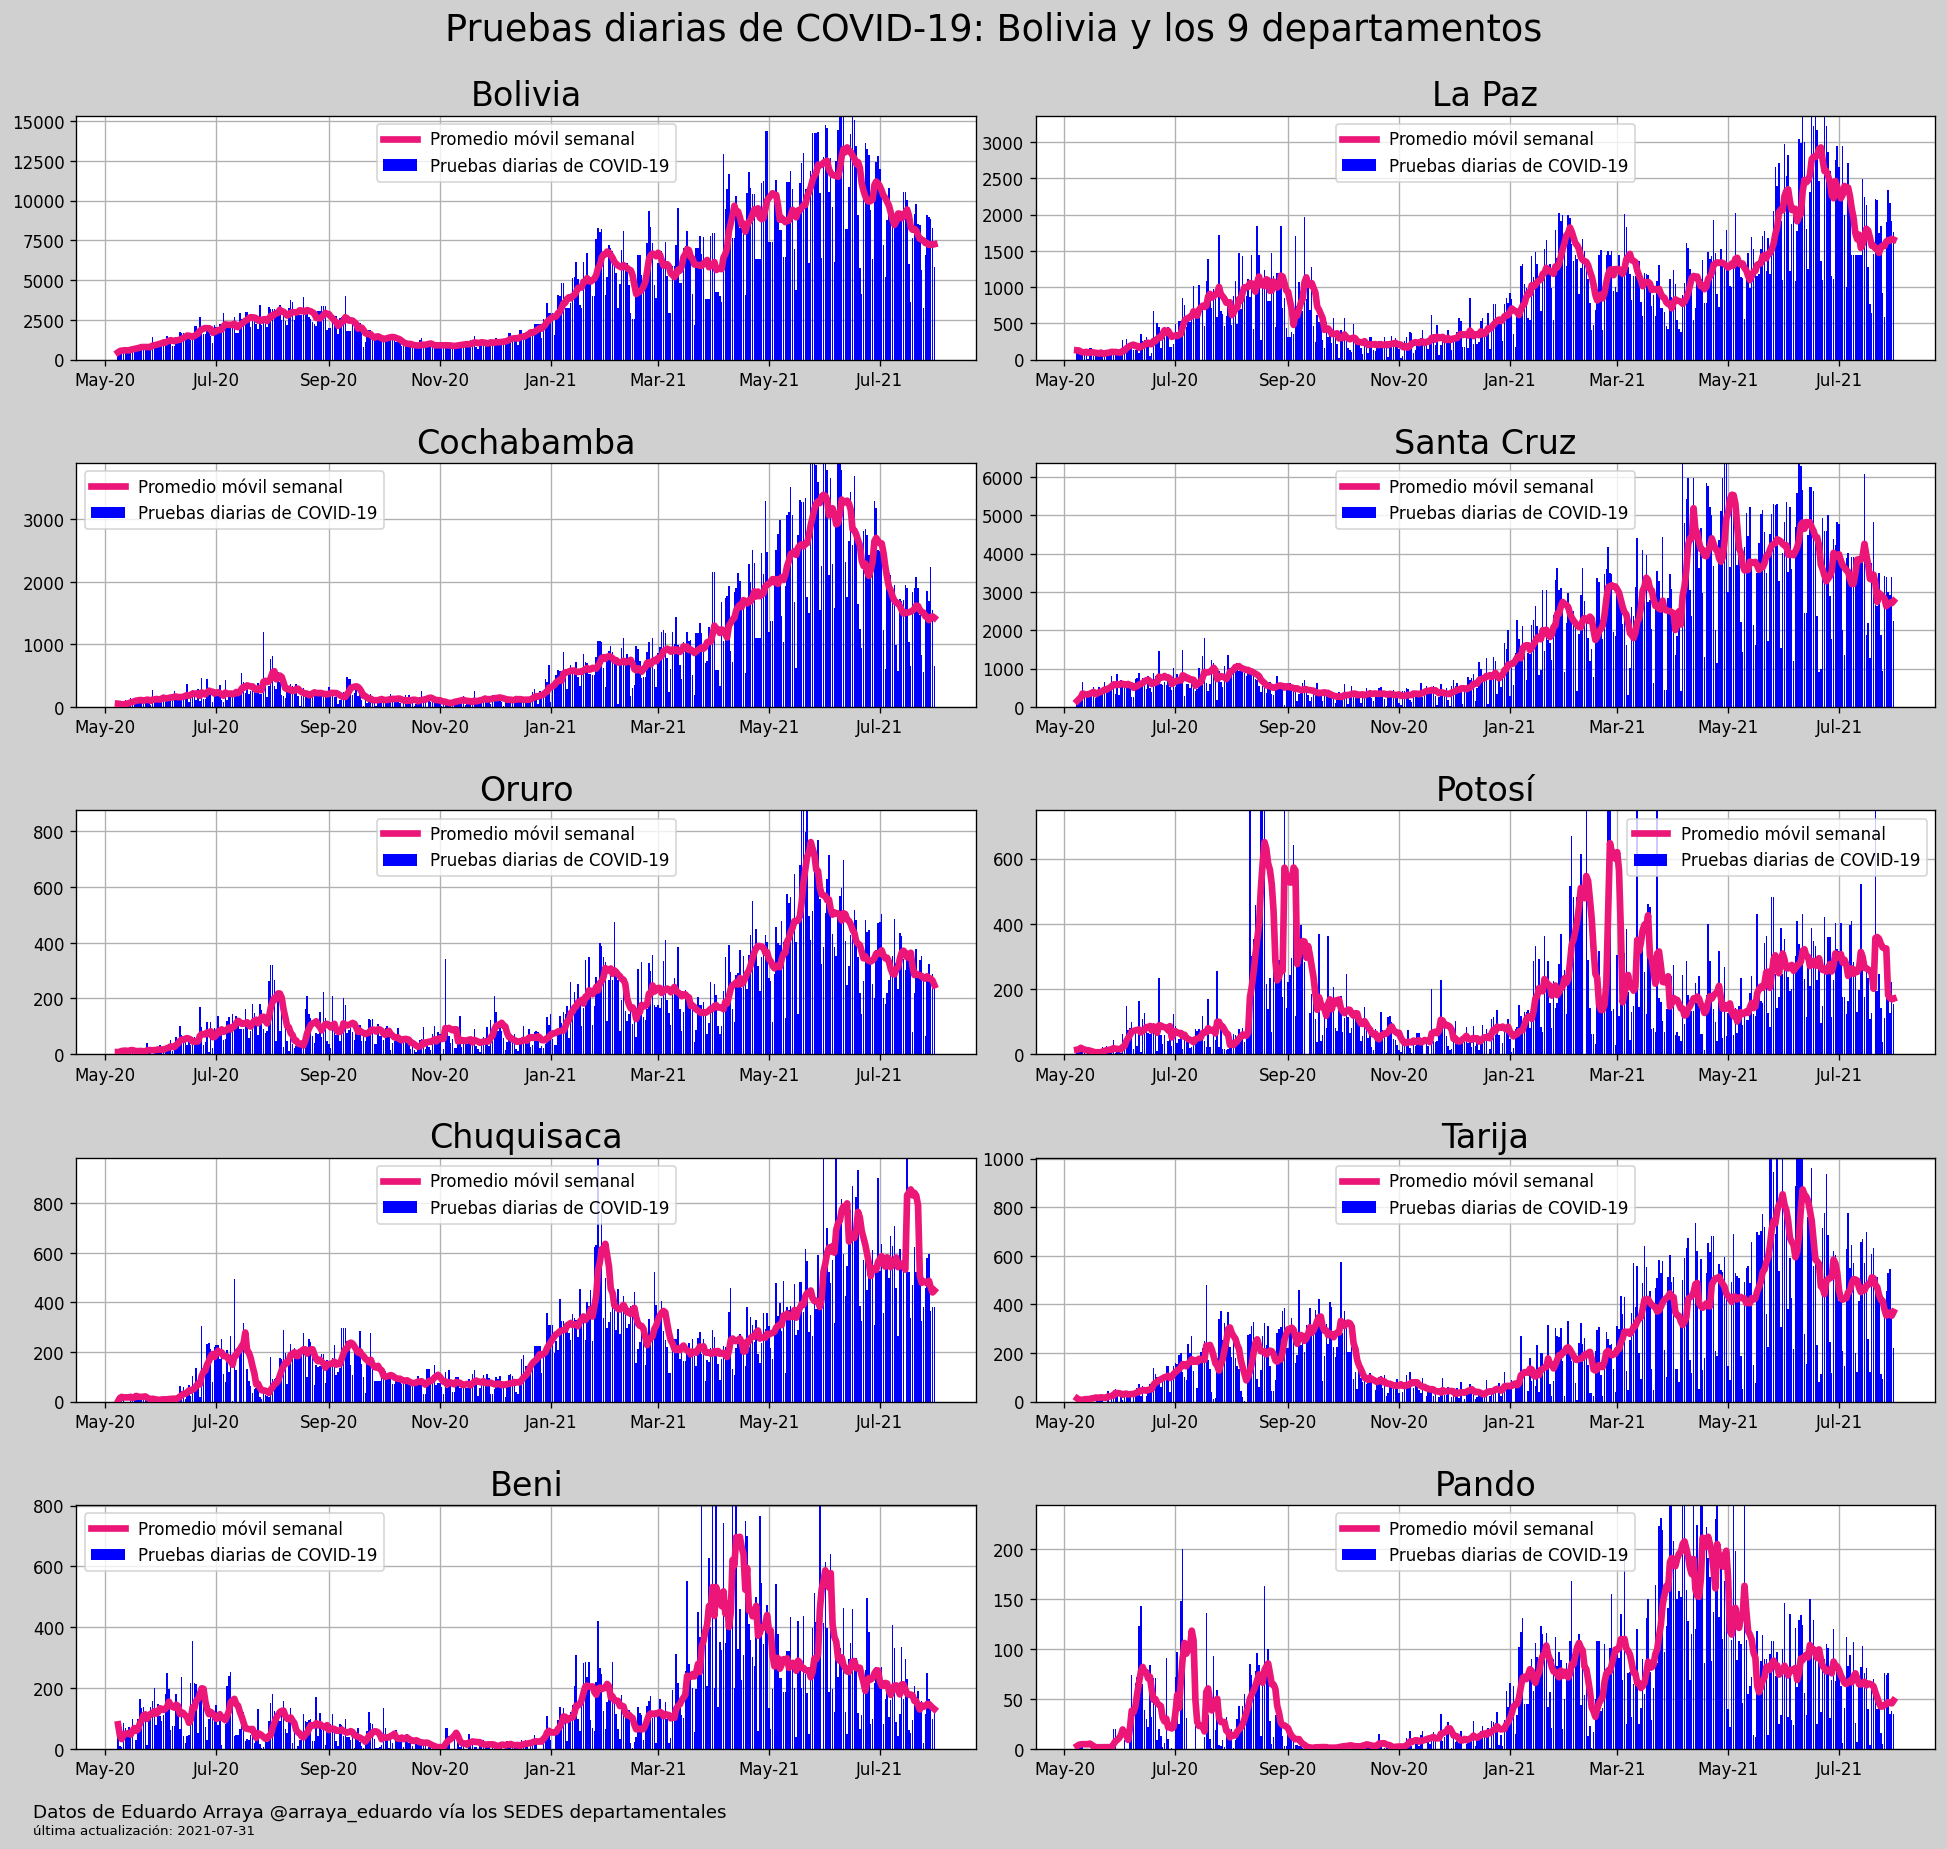

In [20]:
fig, axs = plt.subplots(5,2, figsize = (16,14), dpi=120)
fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=4)
axs = axs.flatten()

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("Pruebas diarias de COVID-19: Bolivia y los 9 departamentos", fontsize= 22, y=1.055)
fig.text(0.0,-.02,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales", fontsize=11)
fig.text(0, -.03,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=8)

for i in range(10):
  axs[i].grid(zorder=1)
  axs[i].bar(pruebas_diarias.index, pruebas_diarias[pruebas_diarias.columns[i]], color = "b", label="Pruebas diarias de COVID-19",width=.8,zorder=2)
  axs[i].set_title(pruebas_diarias.columns[i], fontsize = 20)
  axs[i].plot(pruebas_diarias.index, pruebas_diarias7[pruebas_diarias7.columns[i]], color = "#EB1677", label="Promedio móvil semanal", zorder=3, linewidth=4)
  axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,pruebas_diarias7[pruebas_diarias7.columns[i]].max()*1.15)
  axs[i].legend()
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))



fig.savefig(directory + "graficas/pruebas_diarias.jpg", bbox_inches="tight")

# Positividad
Positividad = (confirmados)/(pruebas procesadas)

In [21]:
positividad_diaria_raw = casos_diarios / pruebas_diarias
positividad_diaria_raw = positividad_diaria_raw.drop(positividad_diaria_raw.index[0:59])


positividad_diaria_raw.to_csv(directory + "positividad_diaria_raw.csv")

positividad_diaria_raw

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-05-08,0.404814,0.179688,0.153846,0.439490,0.125000,0.000000,0.000000,0.230769,1.000000,0.000000
2020-05-09,0.276475,0.056911,0.108696,0.585938,0.625000,0.000000,0.107143,0.500000,0.000000,0.000000
2020-05-10,0.192401,0.112676,0.529412,0.276657,0.150000,0.000000,0.035714,NaN,0.285714,0.000000
2020-05-11,0.444624,0.048193,0.555556,0.293663,0.000000,0.142857,0.000000,0.000000,0.892857,0.000000
2020-05-12,0.215036,0.029126,0.179487,0.392308,0.222222,0.000000,NaN,0.136364,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-07-27,0.092416,0.064635,0.092333,0.082696,0.036232,0.215385,0.145581,0.182418,0.075697,0.013514
2021-07-28,0.101208,0.068657,0.087730,0.100399,0.090062,0.221198,0.223906,0.137996,0.012195,0.118421
2021-07-29,0.116508,0.110342,0.097365,0.101568,0.125899,0.428571,0.208791,0.163303,0.110345,0.114286
2021-07-30,0.103273,0.087774,0.110180,0.085781,0.090278,0.170404,0.227749,0.173684,0.061224,0.026316


In [22]:
# positividad_diaria.plot(figsize = (20,7))
# plt.ylim(0,1)
# plt.title("Positividad diaria de pruebas COVID-19 en Bolivia")

In [23]:
positividad_diaria_adj = positividad_diaria_raw.rolling(7,min_periods=1).mean()


positividad_diaria_adj.to_csv(directory + "positividad_diaria_ajuste.csv")

positividad_diaria_adj

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-05-08,0.404814,0.179688,0.153846,0.439490,0.125000,0.000000,0.000000,0.230769,1.000000,0.000000
2020-05-09,0.340645,0.118299,0.131271,0.512714,0.375000,0.000000,0.053571,0.365385,0.500000,0.000000
2020-05-10,0.291230,0.116425,0.263985,0.434028,0.300000,0.000000,0.047619,0.365385,0.428571,0.000000
2020-05-11,0.329579,0.099367,0.336877,0.398937,0.225000,0.035714,0.035714,0.243590,0.544643,0.000000
2020-05-12,0.306670,0.085319,0.305399,0.397611,0.224444,0.028571,0.035714,0.216783,0.435714,0.000000
...,...,...,...,...,...,...,...,...,...,...
2021-07-27,0.116246,0.100631,0.102126,0.102801,0.092547,0.247683,0.235033,0.201281,0.065774,0.045522
2021-07-28,0.113518,0.098325,0.095519,0.097788,0.092151,0.271900,0.233631,0.189012,0.050761,0.053072
2021-07-29,0.113912,0.098828,0.096660,0.099608,0.094432,0.284523,0.228905,0.188439,0.057596,0.069399
2021-07-30,0.111386,0.094368,0.097317,0.098375,0.093381,0.267467,0.223180,0.189089,0.060040,0.066189


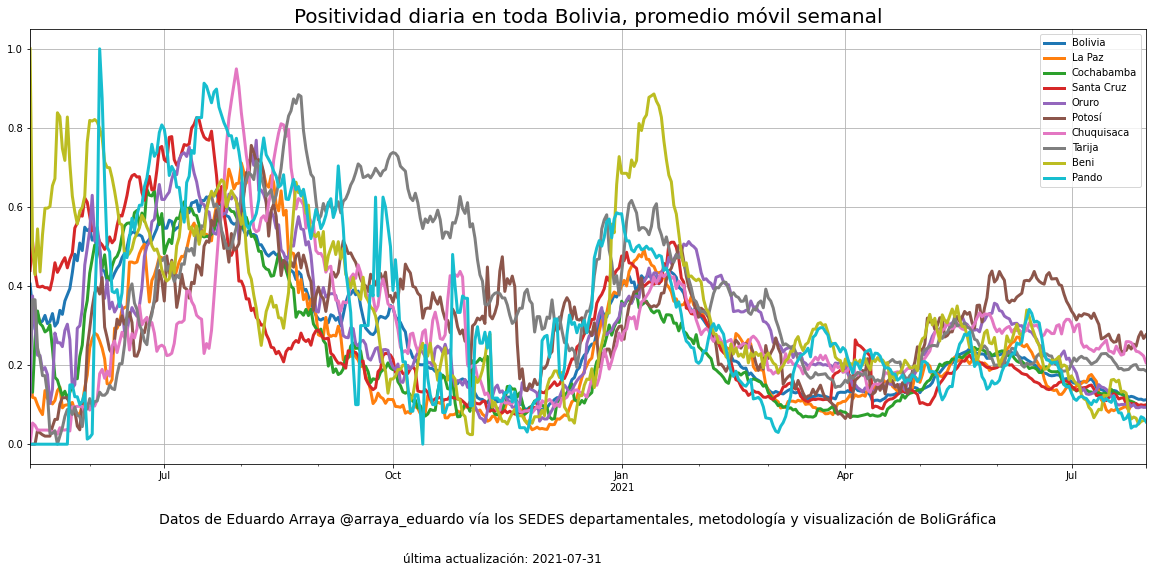

In [24]:
positividad_diaria_adj.plot(figsize = (20,8),zorder=2, linewidth=3)

plt.grid(zorder=1)
plt.title("Positividad diaria en toda Bolivia, promedio móvil semanal", fontsize =20)

plt.text(18442,-.2,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales, metodología y visualización de BoliGráfica", fontsize=14)
plt.text(18540, -.3,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=12)
#axs.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
#.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))


plt.savefig(directory + "graficas/positividad_diaria_todos.jpg", dpi=120)

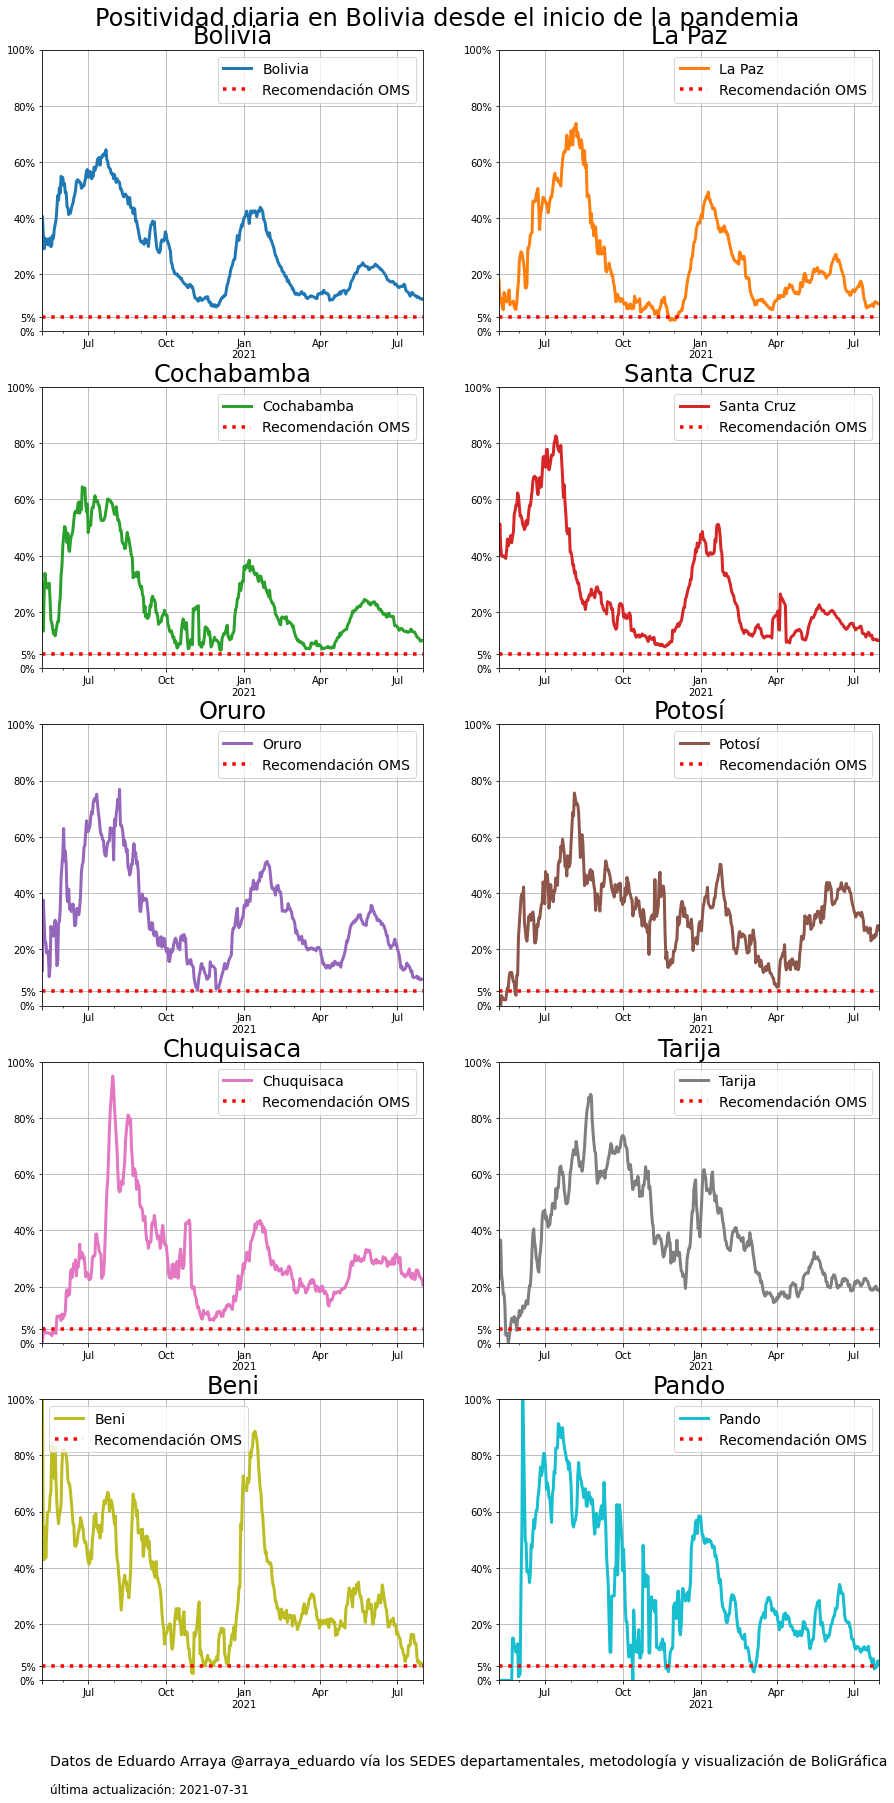

In [25]:
axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(5,2), sharey=False, sharex=False, figsize = (15,30), linewidth = 3)

axs[0][0].get_figure().suptitle('Positividad diaria en Bolivia desde el inicio de la pandemia', y=.9, fontsize = 24)
axs = axs.flatten()

for i in range(10):
  axs[i].grid()
  axs[i].set_title(positividad_diaria_adj.columns[i], fontsize = 24)
  axs[i].set_ylim(0,1)
  axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
  axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS", linewidth=3.5)
  axs[i].legend(fontsize = 14)
  axs[i].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

plt.text(17860,-.3,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales, metodología y visualización de BoliGráfica", fontsize=14)
plt.text(17860, -.4,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=12)

plt.savefig(directory + "graficas/positividad_diaria_subplots.jpg", dpi=120)

In [26]:
# axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(2,5), sharey=False, figsize = (20,8))

# axs[0][0].get_figure().suptitle('Positividad diaria en Bolivia desde enero 2021, media móvil de 7 días', y=.96, fontsize = 24)
# axs = axs.flatten()

# for i in range(10):
#   axs[i].grid()
#   axs[i].set_ylim(0,1)
#   axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
#   axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS")
#   axs[i].legend()
#   axs[i].set_xlim("2021-01-01", positividad_diaria_adj.index[-1])


# plt.savefig(directory + "positividad_2021.jpg")

#MIX

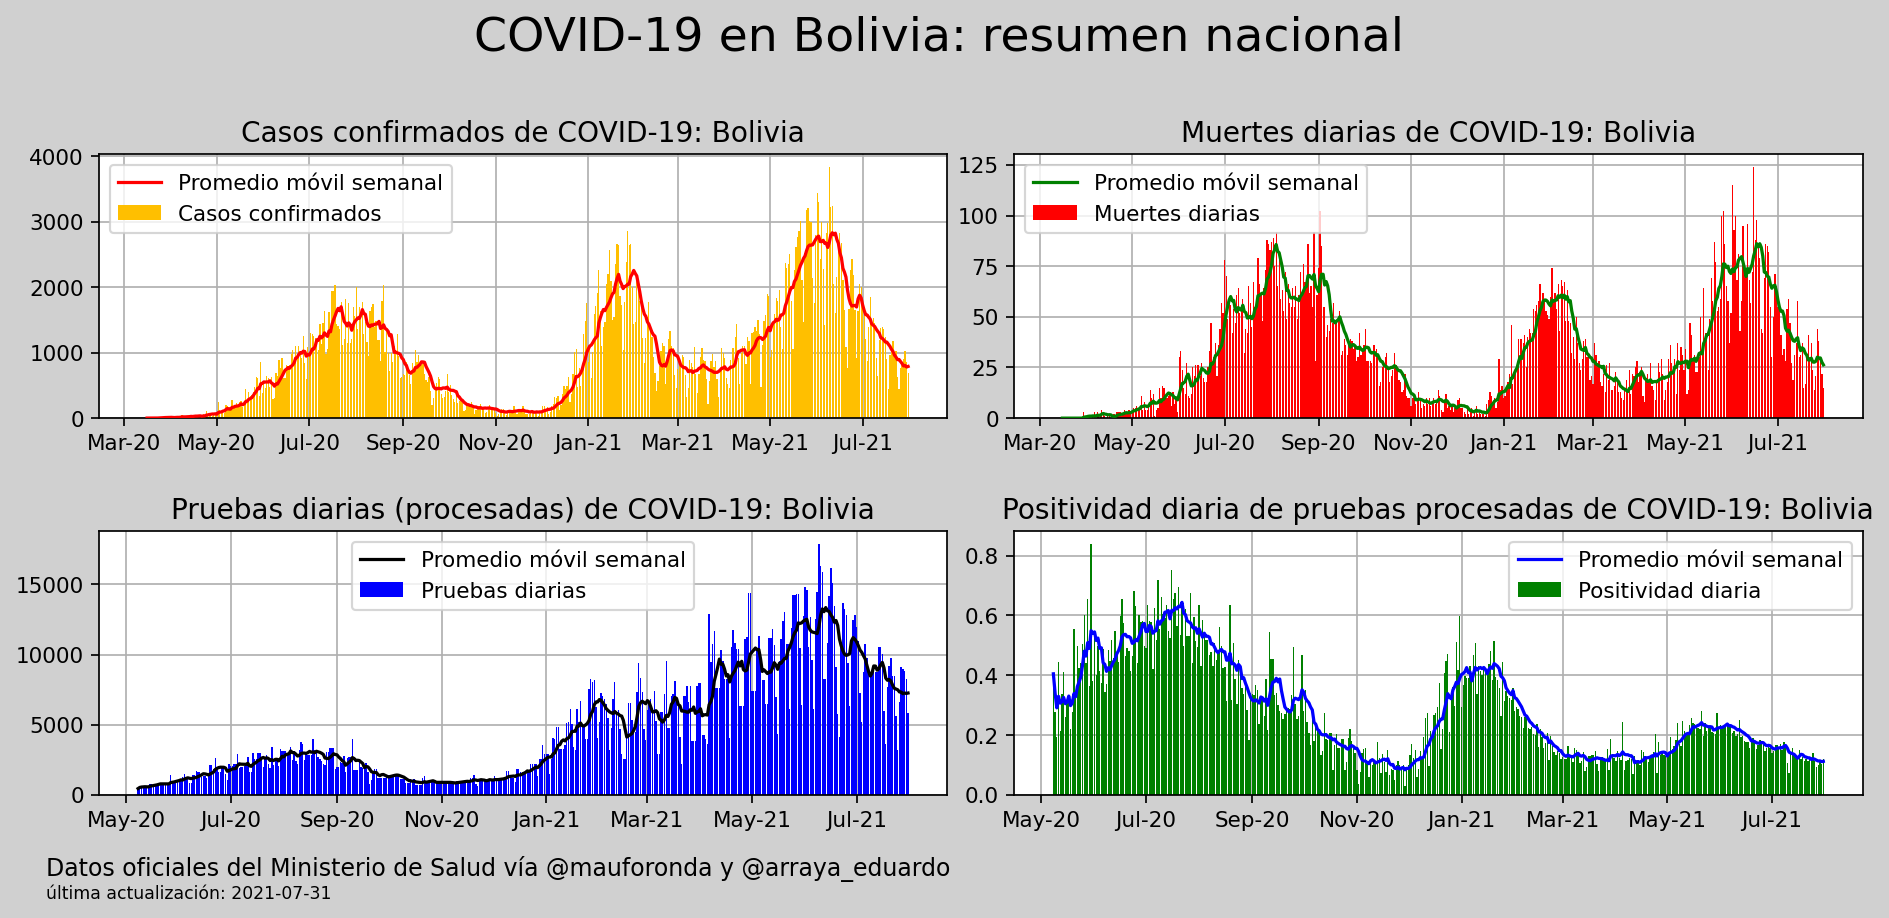

In [27]:
fig, axs = plt.subplots(2,2, figsize = (12,5), dpi=155)
axs = axs.flatten()
fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("COVID-19 en Bolivia: resumen nacional", fontsize= 22, y=1.06)
fig.text(0.02,-.05,"Datos oficiales del Ministerio de Salud vía @mauforonda y @arraya_eduardo", fontsize=11)
fig.text(.02, -.08,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8)

axs[0].grid(zorder=3)
axs[0].set_title("Casos confirmados de COVID-19: Bolivia", fontsize=13) 
axs[0].bar(casos_diarios.index, casos_diarios.Bolivia, color = "#ffbf00", label="Casos confirmados",width=.8,zorder=2)
axs[0].plot(casos_diarios.index, casos_diarios7.Bolivia, color = "r", label="Promedio móvil semanal", zorder=3)
axs[0].set_facecolor(background_color2)
#axs[0].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.15)
axs[0].legend()
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

axs[1].grid(zorder=3)
axs[1].set_title("Muertes diarias de COVID-19: Bolivia", fontsize=13) 
axs[1].bar(muertes_diarias.index, muertes_diarias.Bolivia, color = "r", label="Muertes diarias",width=.8,zorder=2)
axs[1].plot(muertes_diarias.index, muertes_diarias7.Bolivia, color = "g", label="Promedio móvil semanal", zorder=3)
axs[1].set_facecolor(background_color2)
#axs[1].set_ylim(0,muertes_diarias7[muertes_diarias7.columns[i]].max()*1.15)
axs[1].legend()
axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


axs[2].grid(zorder=3)
axs[2].set_title("Pruebas diarias (procesadas) de COVID-19: Bolivia", fontsize=13) 
axs[2].bar(pruebas_diarias.index, pruebas_diarias.Bolivia, color = "b", label="Pruebas diarias",width=.8,zorder=2)
axs[2].plot(pruebas_diarias.index, pruebas_diarias7.Bolivia, color = "black", label="Promedio móvil semanal", zorder=3)
axs[2].set_facecolor(background_color2)
#axs[2].set_ylim(0,pruebas_diarias7[pruebas_diarias7.columns[i]].max()*1.15)
axs[2].legend()
axs[2].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


axs[3].grid(zorder=3)
axs[3].set_title("Positividad diaria de pruebas procesadas de COVID-19: Bolivia", fontsize=13) 
axs[3].bar(positividad_diaria_raw.index, positividad_diaria_raw.Bolivia, color = "g", label="Positividad diaria",width=.8,zorder=2)
axs[3].plot(positividad_diaria_raw.index, positividad_diaria_adj.Bolivia, color = "b", label="Promedio móvil semanal", zorder=3)
axs[3].set_facecolor(background_color2)
#axs[3].set_ylim(0,positividad_diaria_adj[positividad_diaria_adj.olumns[i]].max()*1.15)
axs[3].legend()
axs[3].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)


fig.savefig(directory + "graficas/resumen_nacional.jpg", bbox_inches="tight")

#ACTIVOS


In [28]:
activos = casos_diarios.rolling(14).sum()-muertes_diarias.rolling(14).sum()
activos.index = pd.to_datetime(activos.index)

activos

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-07-27,12780.0,2027.0,2398.0,4150.0,351.0,724.0,1727.0,1167.0,201.0,35.0
2021-07-28,12308.0,2030.0,2316.0,3971.0,349.0,677.0,1683.0,1096.0,149.0,37.0
2021-07-29,11970.0,2080.0,2299.0,3743.0,349.0,678.0,1565.0,1073.0,151.0,32.0
2021-07-30,11595.0,2024.0,2192.0,3664.0,342.0,640.0,1537.0,1028.0,137.0,31.0


In [29]:
act_colors = []
viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap("inferno")
list(viridis(range(12)))

viridis(range(10))[3]

array([0.220057, 0.343307, 0.549413, 1.      ])

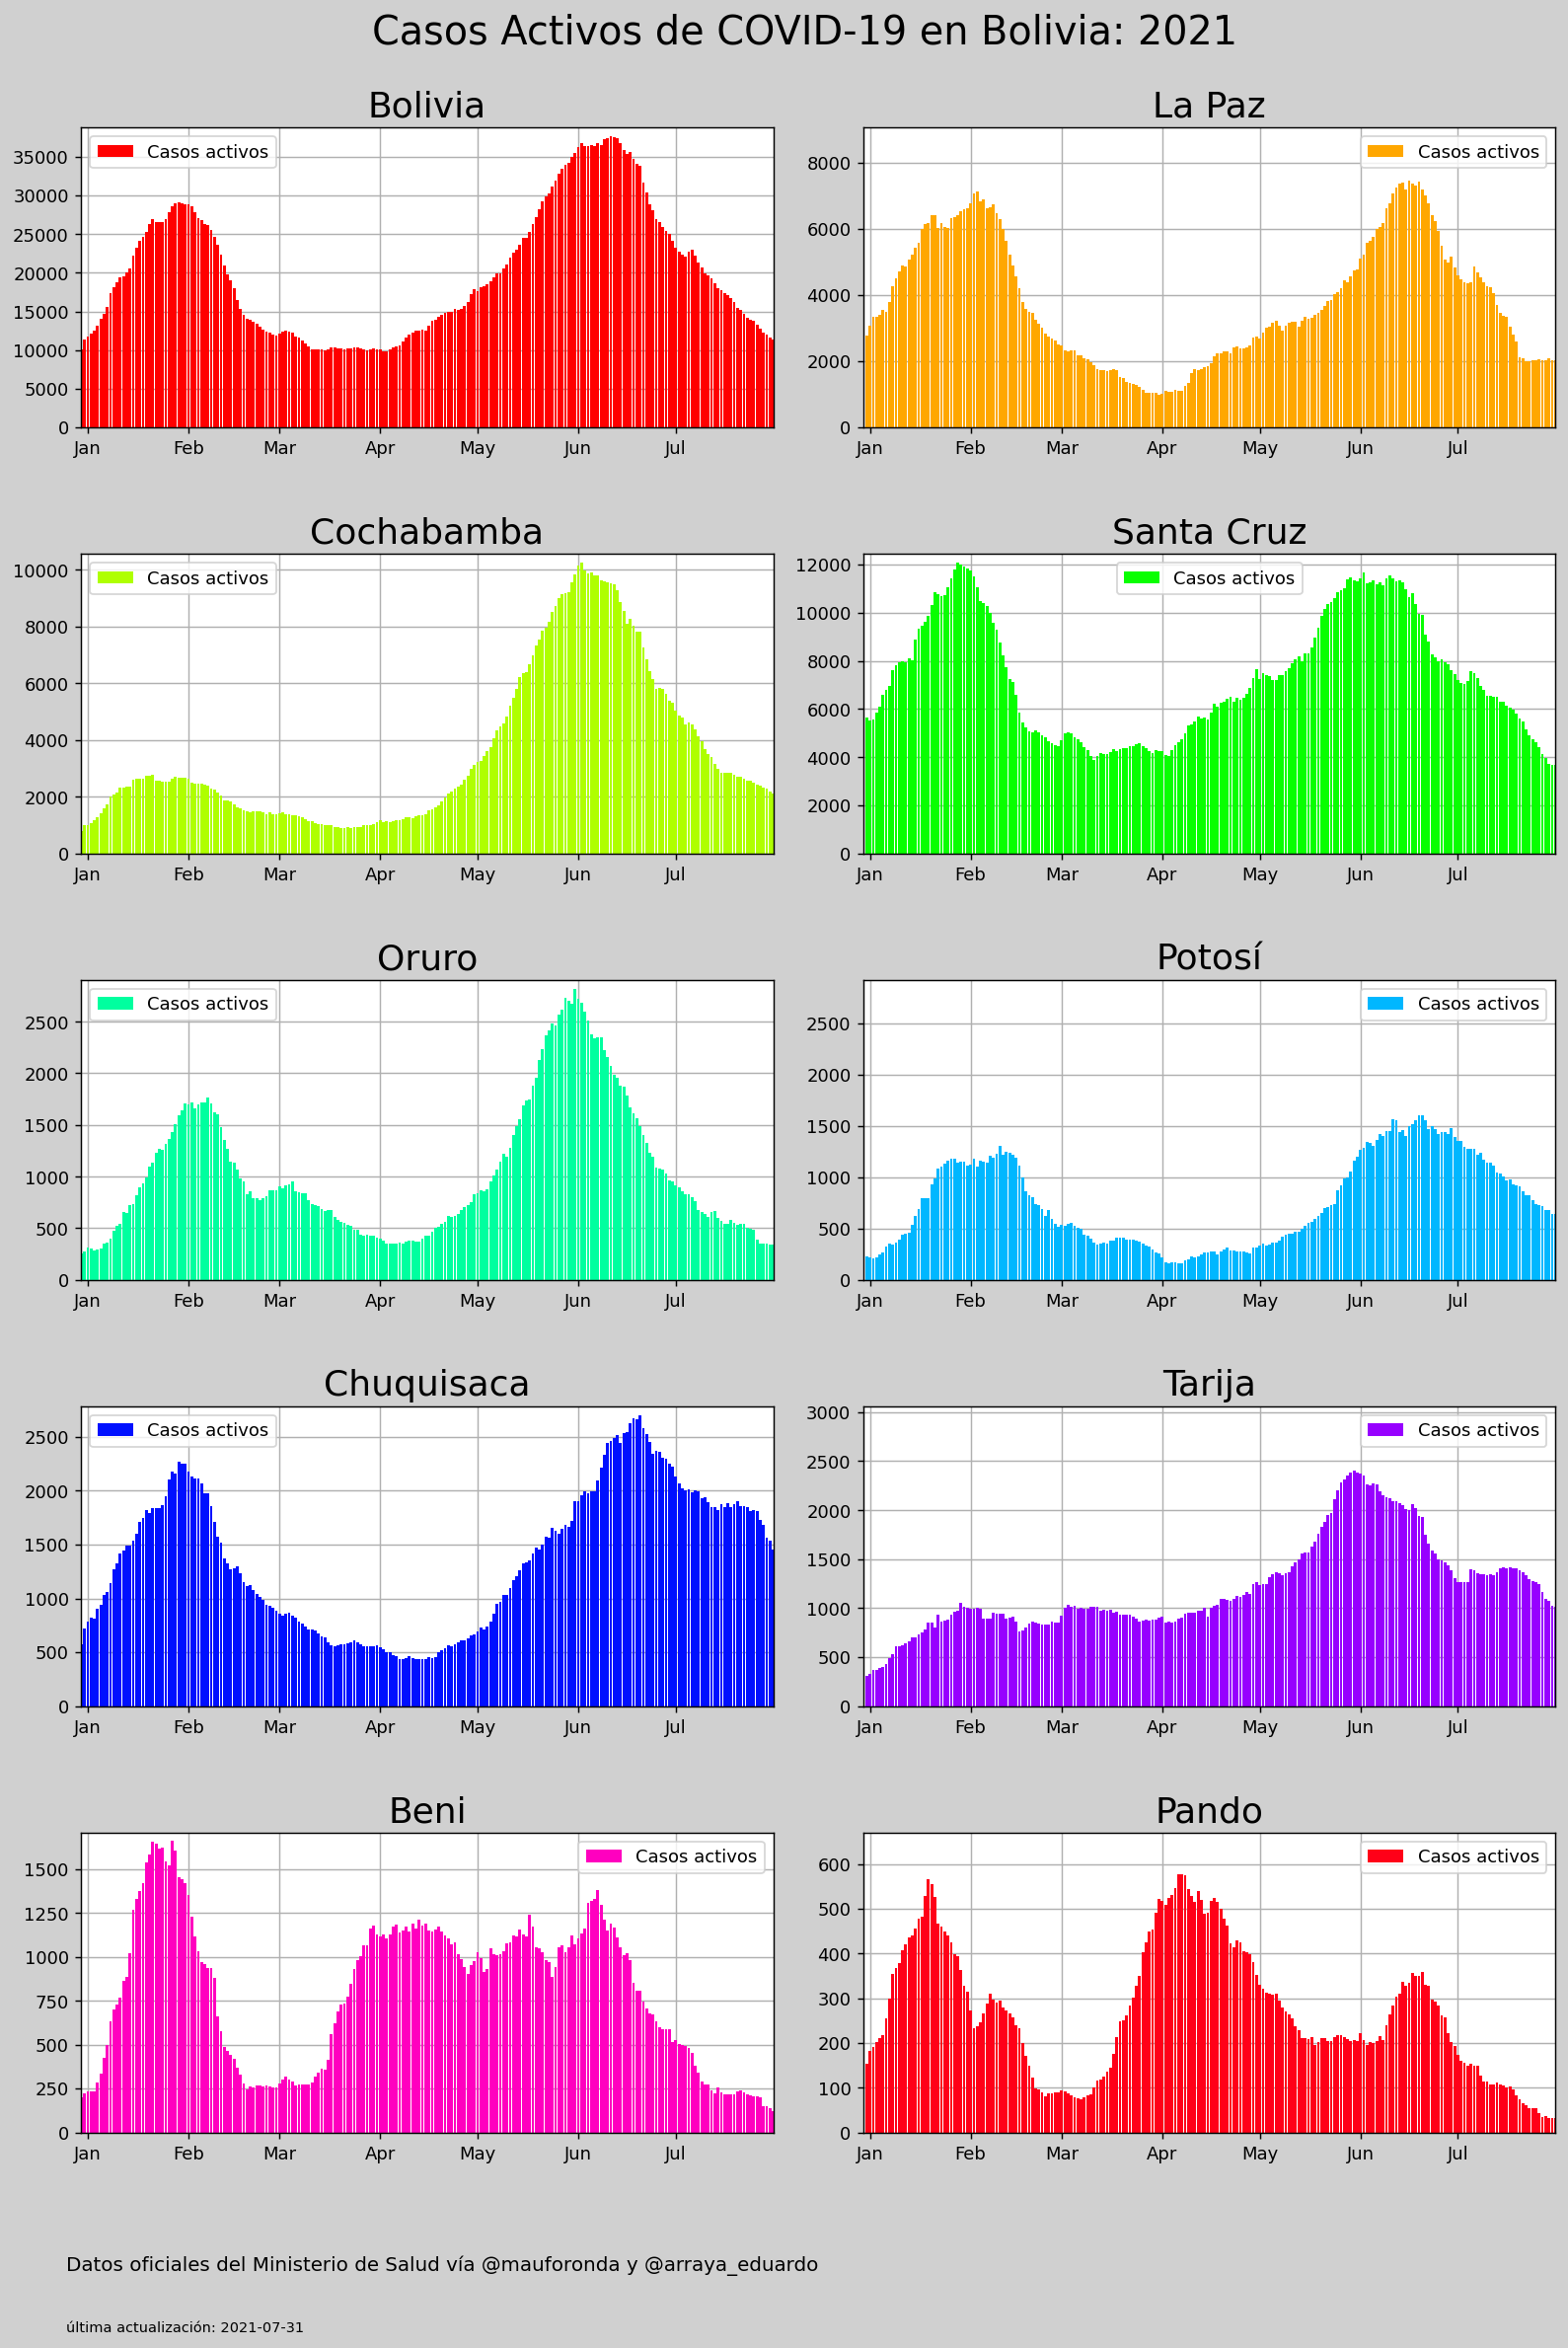

In [30]:
fig, axs = plt.subplots(5,2, figsize = (12,16), dpi=130)
axs = axs.flatten()
fig.tight_layout(pad=0.3, w_pad=2, h_pad=5)

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("Casos Activos de COVID-19 en Bolivia: 2021", fontsize= 22, y=1.05)
fig.text(0.02,-.05,"Datos oficiales del Ministerio de Salud vía @mauforonda y @arraya_eduardo", fontsize=11)
fig.text(.02, -.08,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8)

for i in range(10):
   axs[i].grid(zorder=3)
   axs[i].set_title(activos.columns[i], fontsize=20) 
   axs[i].bar(activos.index, activos[activos[295:-1].columns[i]], label="Casos activos",width=.85, zorder=2, 
              color = cm.get_cmap("hsv",10)(range(10)[i]))
   axs[i].set_facecolor(background_color2)
   axs[i].legend()
   axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
   axs[i].set_xlim(activos.index[295], activos.index[-1])
   axs[i].set_ylim(0, activos[activos[295:-1].columns[i]].max() * 1.03)



fig.savefig(directory + "graficas/activos.jpg", bbox_inches="tight")

In [31]:
activos_ultimo = activos[-1:]
activos_ultimo.T


,2021-07-31
Bolivia,11414.0
La Paz,2015.0
Cochabamba,2107.0
Santa Cruz,3685.0
Oruro,338.0
Potosí,646.0
Chuquisaca,1454.0
Tarija,1018.0
Beni,120.0
Pando,31.0


In [32]:
activos_ultimo.index = ["Activos por cada 10,000 habitantes"]
habitantes.index = ["Activos por cada 10,000 habitantes"]
activos_ultimo_pc = activos_ultimo / habitantes * 10000
activos_ultimo_pc.T


,"Activos por cada 10,000 habitantes"
Bolivia,9.822719
La Paz,6.884182
Cochabamba,10.384426
Santa Cruz,10.934718
Oruro,6.282528
Potosí,7.161863
Chuquisaca,22.825746
Tarija,17.461407
Beni,2.500000
Pando,2.012987


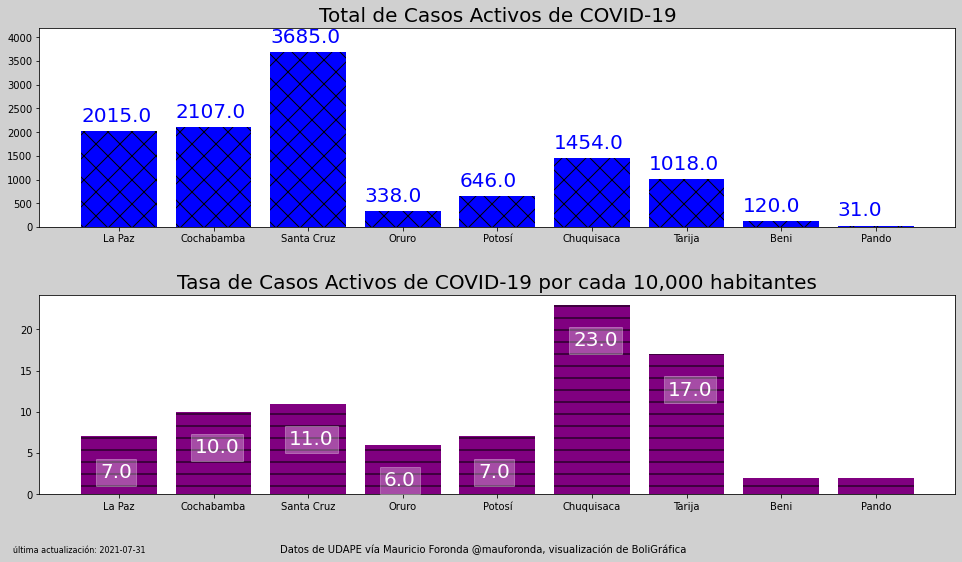

In [33]:
fig, axs = plt.subplots(2,1, figsize=(14,8))

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

axs[0].bar(activos_ultimo.T.index[1:10], 
           activos_ultimo.T[1:10][activos_ultimo.T.columns[0]],
           color = "b", hatch = "x")
axs[0].set_title("Total de Casos Activos de COVID-19", fontsize = 20)
axs[0].set_ylim(0,activos_ultimo.T[1:10][activos_ultimo.T.columns[0]].max()*1.14)
for p in axs[0].patches:
    axs[0].annotate(
        str(p.get_height()),
        (p.get_x() - 0,
        p.get_height()+200),
        fontsize = 20,
        color = "b")


axs[1].bar(activos_ultimo_pc.T.index[1:10], 
           activos_ultimo_pc.T.round(decimals=0)[1:10]["Activos por cada 10,000 habitantes"],
           color = "purple", hatch = "-")
axs[1].set_title("Tasa de Casos Activos de COVID-19 por cada 10,000 habitantes", fontsize = 20)

for p in axs[1].patches:
     axs[1].annotate(
         str(p.get_height()),
         xy = (p.get_x() + 0.2, p.get_height()-5),
         fontsize=20,
         color = "w",
          bbox={
            'edgecolor': 'w',
            'facecolor': 'w', 
            'alpha': 0.3}
         )



fig.tight_layout(pad=3)

fig.text(0.3,0,"Datos de UDAPE vía Mauricio Foronda @mauforonda, visualización de BoliGráfica")
fig.text(.036, -.0,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8)


fig.savefig(directory + "graficas/activos_pc.jpg", bbox_inches = "tight")